In [1]:
import sys
sys.path.append('F:\Cambridge\Project\MHMC-for-VAE/hmc_pytorch')
from hmc_base_pytorch import *
from hmc_unconstrained_pytorch import *
import autograd.numpy as np
import torch
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.normal import Normal
import matplotlib.pyplot as plt

# Get pdf p(y) of proxy variable y for x = g(y) where p(x) is known

In [47]:
def reparameter_pdf(transform, x_pdf, y):
    '''
    transform: function x = g(y) that transforms random variable y into x
    x_pdf: pdf of x
    '''
    # get gradient g'(y)
    #y.grad.zero_()
    #yy = torch.tensor([y.item()], requires_grad=True)
    #y.retain_grad()
    yy = y.clone()
    yy.retain_grad()
    x = transform(yy)
    print("x "+str(x))
    x.backward(retain_graph=True)
    print("y grad "+str(yy.grad))
    grad = torch.abs(yy.grad).float()

    
    # get p_x(x)
    px = x_pdf(x)
    print("px "+str(px))
    result = px*grad
    yy.grad.data.zero_()
    print("result "+str(result))
    #print(px.dtype)
    return result


In [48]:
def transform(y):
    return torch.log(1 + torch.exp(y))

def x_pdf(x):
    m = Normal(torch.tensor([0.]), torch.tensor([1.]))
    m.requires_grad=True
    n = torch.exp(m.log_prob(x))
    #n.requires_grad=True
    return n

def energy_function(y, cache):
    y.retain_grad()
    p = reparameter_pdf(transform, x_pdf, y)
    #y.grad.zero_()
    return 0-torch.log(p)

In [49]:
"""
def energy_function(y, cache):
    y.retain_grad()
    m = Normal(torch.tensor([0.]), torch.tensor([1.]))
    n = torch.exp(m.log_prob(y))
    return 0 - torch.log(n)
    
def gradient(pos, cache):
    pos.retain_grad()
    r = energy_function(pos, cache)
    r.backward(retain_graph=True)
    g = pos.grad.clone()
    
    print("g:"+str(pos.grad))
    #pos.grad.zero_()
    pos.grad.data.zero_()
    return g
    
pos = torch.tensor([0.], requires_grad=True)
gradient(pos, None)
"""

'\ndef energy_function(y, cache):\n    y.retain_grad()\n    m = Normal(torch.tensor([0.]), torch.tensor([1.]))\n    n = torch.exp(m.log_prob(y))\n    return 0 - torch.log(n)\n    \ndef gradient(pos, cache):\n    pos.retain_grad()\n    r = energy_function(pos, cache)\n    r.backward(retain_graph=True)\n    g = pos.grad.clone()\n    \n    print("g:"+str(pos.grad))\n    #pos.grad.zero_()\n    pos.grad.data.zero_()\n    return g\n    \npos = torch.tensor([0.], requires_grad=True)\ngradient(pos, None)\n'

In [50]:
y = torch.tensor([0.], requires_grad=True)
transform(y).requires_grad
#energy_function(y, None).requires_grad

True

In [51]:
sampler = IsotropicHmcSampler(energy_function, energy_grad=None, prng=None,
                 mom_resample_coeff=1., dtype=np.float64)

In [52]:
init = torch.tensor([0.], requires_grad=True)
pos_samples, mom_samples, ratio = sampler.get_samples(init, 0.1, 3, 500, torch.tensor([1.], requires_grad=True))
num = pos_samples.shape[0]
y_list = []
for i in range(num):
    y_list.append(pos_samples[i].item())

========== 1st hamiltonian ==============
x tensor([ 0.6931])
y grad tensor([ 0.5000])
px tensor([ 0.3137])
result tensor([ 0.1569])
Sample: 1
========== simulate ==============
pos:tensor([ 0.]) True
------calling energy function------
x tensor([ 0.6931])
y grad tensor([ 0.5000])
px tensor([ 0.3137])
result tensor([ 0.1569])
g:tensor([ 0.8466])
grad1:tensor([ 0.8466])
momtensor([-1.4303])
------calling energy function------
x tensor([ 0.6222])
y grad tensor([ 0.4633])
px tensor([ 0.3287])
result tensor([ 0.1523])
g:tensor([ 0.7515])
------calling energy function------
x tensor([ 0.5535])
y grad tensor([ 0.4251])
px tensor([ 0.3423])
result tensor([ 0.1455])
g:tensor([ 0.6603])
------calling energy function------
x tensor([ 0.4880])
y grad tensor([ 0.3862])
px tensor([ 0.3542])
result tensor([ 0.1368])
g:tensor([ 0.5746])
========== 2nd hamiltonian ==============
x tensor([ 0.4880])
y grad tensor([ 0.3862])
px tensor([ 0.3542])
result tensor([ 0.1368])
========== 3rd hamiltonian ======

px tensor([ 0.3511])
result tensor([ 0.1393])
g:tensor([ 0.5973])
grad1:tensor([ 0.5973])
momtensor([ 1.5906])
------calling energy function------
x tensor([ 0.5703])
y grad tensor([ 0.4347])
px tensor([ 0.3391])
result tensor([ 0.1474])
g:tensor([ 0.6826])
------calling energy function------
x tensor([ 0.6380])
y grad tensor([ 0.4716])
px tensor([ 0.3255])
result tensor([ 0.1535])
g:tensor([ 0.7725])
------calling energy function------
x tensor([ 0.7072])
y grad tensor([ 0.5070])
px tensor([ 0.3107])
result tensor([ 0.1575])
g:tensor([ 0.8655])
========== 2nd hamiltonian ==============
x tensor([ 0.7072])
y grad tensor([ 0.5070])
px tensor([ 0.3107])
result tensor([ 0.1575])
========== 3rd hamiltonian ==============
x tensor([ 0.7072])
y grad tensor([ 0.5070])
px tensor([ 0.3107])
result tensor([ 0.1575])
Sample: 11
========== simulate ==============
pos:tensor(1.00000e-02 *
       [ 2.7925]) True
------calling energy function------
x tensor([ 0.7072])
y grad tensor([ 0.5070])
px tens

y grad tensor([ 0.7316])
px tensor([ 0.1680])
result tensor([ 0.1229])
========== 3rd hamiltonian ==============
x tensor([ 1.3154])
y grad tensor([ 0.7316])
px tensor([ 0.1680])
result tensor([ 0.1229])
Sample: 22
========== simulate ==============
pos:tensor([ 1.0029]) True
------calling energy function------
x tensor([ 1.3154])
y grad tensor([ 0.7316])
px tensor([ 0.1680])
result tensor([ 0.1229])
g:tensor([ 1.6940])
grad1:tensor([ 1.6940])
momtensor([-0.2054])
------calling energy function------
x tensor([ 1.2942])
y grad tensor([ 0.7259])
px tensor([ 0.1727])
result tensor([ 0.1253])
g:tensor([ 1.6654])
------calling energy function------
x tensor([ 1.2613])
y grad tensor([ 0.7167])
px tensor([ 0.1801])
result tensor([ 0.1291])
g:tensor([ 1.6207])
------calling energy function------
x tensor([ 1.2173])
y grad tensor([ 0.7040])
px tensor([ 0.1902])
result tensor([ 0.1339])
g:tensor([ 1.5610])
========== 2nd hamiltonian ==============
x tensor([ 1.2173])
y grad tensor([ 0.7040])
px 

y grad tensor([ 0.3663])
px tensor([ 0.3595])
result tensor([ 0.1317])
========== 3rd hamiltonian ==============
x tensor([ 0.4562])
y grad tensor([ 0.3663])
px tensor([ 0.3595])
result tensor([ 0.1317])
Sample: 32
========== simulate ==============
pos:tensor([-0.5481]) True
------calling energy function------
x tensor([ 0.4562])
y grad tensor([ 0.3663])
px tensor([ 0.3595])
result tensor([ 0.1317])
g:tensor([ 0.5334])
grad1:tensor([ 0.5334])
momtensor([ 0.1627])
------calling energy function------
x tensor([ 0.4612])
y grad tensor([ 0.3695])
px tensor([ 0.3587])
result tensor([ 0.1325])
g:tensor([ 0.5399])
------calling energy function------
x tensor([ 0.4642])
y grad tensor([ 0.3714])
px tensor([ 0.3582])
result tensor([ 0.1330])
g:tensor([ 0.5438])
------calling energy function------
x tensor([ 0.4653])
y grad tensor([ 0.3720])
px tensor([ 0.3580])
result tensor([ 0.1332])
g:tensor([ 0.5451])
========== 2nd hamiltonian ==============
x tensor([ 0.4653])
y grad tensor([ 0.3720])
px 

g:tensor([ 1.1233])
grad1:tensor([ 1.1233])
momtensor([ 0.2845])
------calling energy function------
x tensor([ 0.9105])
y grad tensor([ 0.5977])
px tensor([ 0.2636])
result tensor([ 0.1575])
g:tensor([ 1.1418])
------calling energy function------
x tensor([ 0.9173])
y grad tensor([ 0.6004])
px tensor([ 0.2619])
result tensor([ 0.1573])
g:tensor([ 1.1512])
------calling energy function------
x tensor([ 0.9173])
y grad tensor([ 0.6004])
px tensor([ 0.2619])
result tensor([ 0.1573])
g:tensor([ 1.1511])
========== 2nd hamiltonian ==============
x tensor([ 0.9173])
y grad tensor([ 0.6004])
px tensor([ 0.2619])
result tensor([ 0.1573])
========== 3rd hamiltonian ==============
x tensor([ 0.9173])
y grad tensor([ 0.6004])
px tensor([ 0.2619])
result tensor([ 0.1573])
Sample: 44
========== simulate ==============
pos:tensor([ 0.4071]) True
------calling energy function------
x tensor([ 0.9173])
y grad tensor([ 0.6004])
px tensor([ 0.2619])
result tensor([ 0.1573])
g:tensor([ 1.1511])
grad1:te

x tensor([ 0.4740])
y grad tensor([ 0.3775])
px tensor([ 0.3566])
result tensor([ 0.1346])
g:tensor([ 0.5564])
========== 2nd hamiltonian ==============
x tensor([ 0.4740])
y grad tensor([ 0.3775])
px tensor([ 0.3566])
result tensor([ 0.1346])
========== 3rd hamiltonian ==============
x tensor([ 0.6257])
y grad tensor([ 0.4651])
px tensor([ 0.3280])
result tensor([ 0.1526])
Sample: 52
========== simulate ==============
pos:tensor([-0.1399]) True
------calling energy function------
x tensor([ 0.6257])
y grad tensor([ 0.4651])
px tensor([ 0.3280])
result tensor([ 0.1526])
g:tensor([ 0.7561])
grad1:tensor([ 0.7561])
momtensor([ 0.1412])
------calling energy function------
x tensor([ 0.6305])
y grad tensor([ 0.4677])
px tensor([ 0.3270])
result tensor([ 0.1529])
g:tensor([ 0.7625])
------calling energy function------
x tensor([ 0.6318])
y grad tensor([ 0.4683])
px tensor([ 0.3268])
result tensor([ 0.1530])
g:tensor([ 0.7642])
------calling energy function------
x tensor([ 0.6295])
y grad t

y grad tensor([ 0.3027])
px tensor([ 0.3738])
result tensor([ 0.1132])
g:tensor([ 0.4119])
========== 2nd hamiltonian ==============
x tensor([ 0.3606])
y grad tensor([ 0.3027])
px tensor([ 0.3738])
result tensor([ 0.1132])
========== 3rd hamiltonian ==============
x tensor([ 0.3606])
y grad tensor([ 0.3027])
px tensor([ 0.3738])
result tensor([ 0.1132])
Sample: 62
========== simulate ==============
pos:tensor([-0.8344]) True
------calling energy function------
x tensor([ 0.3606])
y grad tensor([ 0.3027])
px tensor([ 0.3738])
result tensor([ 0.1132])
g:tensor([ 0.4119])
grad1:tensor([ 0.4119])
momtensor([ 0.3157])
------calling energy function------
x tensor([ 0.3696])
y grad tensor([ 0.3090])
px tensor([ 0.3726])
result tensor([ 0.1151])
g:tensor([ 0.4232])
------calling energy function------
x tensor([ 0.3775])
y grad tensor([ 0.3144])
px tensor([ 0.3715])
result tensor([ 0.1168])
g:tensor([ 0.4331])
------calling energy function------
x tensor([ 0.3841])
y grad tensor([ 0.3189])
px 

g:tensor([ 0.2512])
------calling energy function------
x tensor([ 0.2585])
y grad tensor([ 0.2278])
px tensor([ 0.3858])
result tensor(1.00000e-02 *
       [ 8.7891])
g:tensor([ 0.2867])
========== 2nd hamiltonian ==============
x tensor([ 0.2585])
y grad tensor([ 0.2278])
px tensor([ 0.3858])
result tensor(1.00000e-02 *
       [ 8.7891])
========== 3rd hamiltonian ==============
x tensor([ 0.2585])
y grad tensor([ 0.2278])
px tensor([ 0.3858])
result tensor(1.00000e-02 *
       [ 8.7891])
Sample: 70
========== simulate ==============
pos:tensor([-1.2208]) True
------calling energy function------
x tensor([ 0.2585])
y grad tensor([ 0.2278])
px tensor([ 0.3858])
result tensor(1.00000e-02 *
       [ 8.7891])
g:tensor([ 0.2867])
grad1:tensor([ 0.2867])
momtensor([ 2.5683])
------calling energy function------
x tensor([ 0.3227])
y grad tensor([ 0.2758])
px tensor([ 0.3787])
result tensor([ 0.1044])
g:tensor([ 0.3648])
------calling energy function------
x tensor([ 0.3987])
y grad tensor([

g:tensor([ 0.6956])
grad1:tensor([ 0.6956])
momtensor([ 1.8026])
------calling energy function------
x tensor([ 0.6619])
y grad tensor([ 0.4841])
px tensor([ 0.3205])
result tensor([ 0.1551])
g:tensor([ 0.8046])
------calling energy function------
x tensor([ 0.7471])
y grad tensor([ 0.5263])
px tensor([ 0.3018])
result tensor([ 0.1588])
g:tensor([ 0.9195])
------calling energy function------
x tensor([ 0.8343])
y grad tensor([ 0.5658])
px tensor([ 0.2817])
result tensor([ 0.1594])
g:tensor([ 1.0378])
========== 2nd hamiltonian ==============
x tensor([ 0.8343])
y grad tensor([ 0.5658])
px tensor([ 0.2817])
result tensor([ 0.1594])
========== 3rd hamiltonian ==============
x tensor([ 0.8343])
y grad tensor([ 0.5658])
px tensor([ 0.2817])
result tensor([ 0.1594])
Sample: 80
========== simulate ==============
pos:tensor([ 0.2647]) True
------calling energy function------
x tensor([ 0.8343])
y grad tensor([ 0.5658])
px tensor([ 0.2817])
result tensor([ 0.1594])
g:tensor([ 1.0378])
grad1:te

y grad tensor([ 0.5477])
px tensor([ 0.2912])
result tensor([ 0.1595])
g:tensor([ 0.9821])
------calling energy function------
x tensor([ 0.7877])
y grad tensor([ 0.5451])
px tensor([ 0.2925])
result tensor([ 0.1595])
g:tensor([ 0.9746])
------calling energy function------
x tensor([ 0.7769])
y grad tensor([ 0.5402])
px tensor([ 0.2950])
result tensor([ 0.1594])
g:tensor([ 0.9599])
========== 2nd hamiltonian ==============
x tensor([ 0.7769])
y grad tensor([ 0.5402])
px tensor([ 0.2950])
result tensor([ 0.1594])
========== 3rd hamiltonian ==============
x tensor([ 0.7769])
y grad tensor([ 0.5402])
px tensor([ 0.2950])
result tensor([ 0.1594])
Sample: 89
========== simulate ==============
pos:tensor([ 0.1611]) True
------calling energy function------
x tensor([ 0.7769])
y grad tensor([ 0.5402])
px tensor([ 0.2950])
result tensor([ 0.1594])
g:tensor([ 0.9599])
grad1:tensor([ 0.9599])
momtensor([ 2.9861])
------calling energy function------
x tensor([ 0.9462])
y grad tensor([ 0.6118])
px 

px tensor([ 0.2362])
result tensor([ 0.1513])
g:tensor([ 1.2971])
------calling energy function------
x tensor([ 0.9613])
y grad tensor([ 0.6176])
px tensor([ 0.2513])
result tensor([ 0.1552])
g:tensor([ 1.2113])
========== 2nd hamiltonian ==============
x tensor([ 0.9613])
y grad tensor([ 0.6176])
px tensor([ 0.2513])
result tensor([ 0.1552])
========== 3rd hamiltonian ==============
x tensor([ 0.9613])
y grad tensor([ 0.6176])
px tensor([ 0.2513])
result tensor([ 0.1552])
Sample: 97
========== simulate ==============
pos:tensor([ 0.4794]) True
------calling energy function------
x tensor([ 0.9613])
y grad tensor([ 0.6176])
px tensor([ 0.2513])
result tensor([ 0.1552])
g:tensor([ 1.2113])
grad1:tensor([ 1.2113])
momtensor([ 0.2279])
------calling energy function------
x tensor([ 0.9716])
y grad tensor([ 0.6215])
px tensor([ 0.2488])
result tensor([ 0.1547])
g:tensor([ 1.2255])
------calling energy function------
x tensor([ 0.9744])
y grad tensor([ 0.6226])
px tensor([ 0.2482])
result 

px tensor([ 0.2682])
result tensor([ 0.1582])
g:tensor([ 1.1154])
grad1:tensor([ 1.1154])
momtensor([ 0.2076])
------calling energy function------
x tensor([ 0.9001])
y grad tensor([ 0.5935])
px tensor([ 0.2661])
result tensor([ 0.1579])
g:tensor([ 1.1277])
------calling energy function------
x tensor([ 0.9025])
y grad tensor([ 0.5944])
px tensor([ 0.2655])
result tensor([ 0.1578])
g:tensor([ 1.1309])
------calling energy function------
x tensor([ 0.8981])
y grad tensor([ 0.5926])
px tensor([ 0.2665])
result tensor([ 0.1580])
g:tensor([ 1.1249])
========== 2nd hamiltonian ==============
x tensor([ 0.8981])
y grad tensor([ 0.5926])
px tensor([ 0.2665])
result tensor([ 0.1580])
========== 3rd hamiltonian ==============
x tensor([ 0.8981])
y grad tensor([ 0.5926])
px tensor([ 0.2665])
result tensor([ 0.1580])
Sample: 107
========== simulate ==============
pos:tensor([ 0.3749]) True
------calling energy function------
x tensor([ 0.8981])
y grad tensor([ 0.5926])
px tensor([ 0.2665])
result

px tensor([ 0.1663])
result tensor([ 0.1220])
Sample: 115
========== simulate ==============
pos:tensor([ 1.0129]) True
------calling energy function------
x tensor([ 1.3227])
y grad tensor([ 0.7336])
px tensor([ 0.1663])
result tensor([ 0.1220])
g:tensor([ 1.7039])
grad1:tensor([ 1.7039])
momtensor([-0.4330])
------calling energy function------
x tensor([ 1.2850])
y grad tensor([ 0.7233])
px tensor([ 0.1747])
result tensor([ 0.1264])
g:tensor([ 1.6528])
------calling energy function------
x tensor([ 1.2360])
y grad tensor([ 0.7095])
px tensor([ 0.1859])
result tensor([ 0.1319])
g:tensor([ 1.5863])
------calling energy function------
x tensor([ 1.1770])
y grad tensor([ 0.6918])
px tensor([ 0.1996])
result tensor([ 0.1381])
g:tensor([ 1.5060])
========== 2nd hamiltonian ==============
x tensor([ 1.1770])
y grad tensor([ 0.6918])
px tensor([ 0.1996])
result tensor([ 0.1381])
========== 3rd hamiltonian ==============
x tensor([ 1.1770])
y grad tensor([ 0.6918])
px tensor([ 0.1996])
result

g:tensor([ 1.4832])
------calling energy function------
x tensor([ 1.0872])
y grad tensor([ 0.6629])
px tensor([ 0.2209])
result tensor([ 0.1464])
g:tensor([ 1.3835])
------calling energy function------
x tensor([ 1.0080])
y grad tensor([ 0.6351])
px tensor([ 0.2400])
result tensor([ 0.1524])
g:tensor([ 1.2753])
========== 2nd hamiltonian ==============
x tensor([ 1.0080])
y grad tensor([ 0.6351])
px tensor([ 0.2400])
result tensor([ 0.1524])
========== 3rd hamiltonian ==============
x tensor([ 1.0080])
y grad tensor([ 0.6351])
px tensor([ 0.2400])
result tensor([ 0.1524])
Sample: 124
========== simulate ==============
pos:tensor([ 0.5540]) True
------calling energy function------
x tensor([ 1.0080])
y grad tensor([ 0.6351])
px tensor([ 0.2400])
result tensor([ 0.1524])
g:tensor([ 1.2753])
grad1:tensor([ 1.2753])
momtensor([ 0.1741])
------calling energy function------
x tensor([ 1.0151])
y grad tensor([ 0.6376])
px tensor([ 0.2383])
result tensor([ 0.1520])
g:tensor([ 1.2849])
------c

px tensor([ 0.2427])
result tensor([ 0.1531])
Sample: 132
========== simulate ==============
pos:tensor([ 0.5367]) True
------calling energy function------
x tensor([ 0.9970])
y grad tensor([ 0.6310])
px tensor([ 0.2427])
result tensor([ 0.1531])
g:tensor([ 1.2602])
grad1:tensor([ 1.2602])
momtensor([-1.7938])
------calling energy function------
x tensor([ 0.8840])
y grad tensor([ 0.5869])
px tensor([ 0.2699])
result tensor([ 0.1584])
g:tensor([ 1.1056])
------calling energy function------
x tensor([ 0.7732])
y grad tensor([ 0.5385])
px tensor([ 0.2959])
result tensor([ 0.1593])
g:tensor([ 0.9549])
------calling energy function------
x tensor([ 0.6675])
y grad tensor([ 0.4870])
px tensor([ 0.3193])
result tensor([ 0.1555])
g:tensor([ 0.8120])
========== 2nd hamiltonian ==============
x tensor([ 0.6675])
y grad tensor([ 0.4870])
px tensor([ 0.3193])
result tensor([ 0.1555])
========== 3rd hamiltonian ==============
x tensor([ 0.6675])
y grad tensor([ 0.4870])
px tensor([ 0.3193])
result

grad1:tensor([ 0.2631])
momtensor([-0.4848])
------calling energy function------
x tensor([ 0.2283])
y grad tensor([ 0.2042])
px tensor([ 0.3887])
result tensor(1.00000e-02 *
       [ 7.9348])
g:tensor([ 0.2508])
------calling energy function------
x tensor([ 0.2179])
y grad tensor([ 0.1958])
px tensor([ 0.3896])
result tensor(1.00000e-02 *
       [ 7.6274])
g:tensor([ 0.2384])
------calling energy function------
x tensor([ 0.2074])
y grad tensor([ 0.1873])
px tensor([ 0.3905])
result tensor(1.00000e-02 *
       [ 7.3138])
g:tensor([ 0.2262])
========== 2nd hamiltonian ==============
x tensor([ 0.2074])
y grad tensor([ 0.1873])
px tensor([ 0.3905])
result tensor(1.00000e-02 *
       [ 7.3138])
========== 3rd hamiltonian ==============
x tensor([ 0.2074])
y grad tensor([ 0.1873])
px tensor([ 0.3905])
result tensor(1.00000e-02 *
       [ 7.3138])
Sample: 142
========== simulate ==============
pos:tensor([-1.4676]) True
------calling energy function------
x tensor([ 0.2074])
y grad tensor

y grad tensor([ 0.2400])
px tensor([ 0.3842])
result tensor(1.00000e-02 *
       [ 9.2214])
========== 3rd hamiltonian ==============
x tensor([ 0.2745])
y grad tensor([ 0.2400])
px tensor([ 0.3842])
result tensor(1.00000e-02 *
       [ 9.2214])
Sample: 149
========== simulate ==============
pos:tensor([-1.1526]) True
------calling energy function------
x tensor([ 0.2745])
y grad tensor([ 0.2400])
px tensor([ 0.3842])
result tensor(1.00000e-02 *
       [ 9.2214])
g:tensor([ 0.3059])
grad1:tensor([ 0.3059])
momtensor([ 1.0553])
------calling energy function------
x tensor([ 0.3004])
y grad tensor([ 0.2595])
px tensor([ 0.3813])
result tensor(1.00000e-02 *
       [ 9.8956])
g:tensor([ 0.3375])
------calling energy function------
x tensor([ 0.3275])
y grad tensor([ 0.2793])
px tensor([ 0.3781])
result tensor([ 0.1056])
g:tensor([ 0.3708])
------calling energy function------
x tensor([ 0.3556])
y grad tensor([ 0.2992])
px tensor([ 0.3745])
result tensor([ 0.1121])
g:tensor([ 0.4056])
=====

y grad tensor([ 0.2246])
px tensor([ 0.3862])
result tensor(1.00000e-02 *
       [ 8.6757])
g:tensor([ 0.2818])
------calling energy function------
x tensor([ 0.2972])
y grad tensor([ 0.2571])
px tensor([ 0.3817])
result tensor(1.00000e-02 *
       [ 9.8128])
g:tensor([ 0.3335])
========== 2nd hamiltonian ==============
x tensor([ 0.2972])
y grad tensor([ 0.2571])
px tensor([ 0.3817])
result tensor(1.00000e-02 *
       [ 9.8128])
========== 3rd hamiltonian ==============
x tensor([ 0.2972])
y grad tensor([ 0.2571])
px tensor([ 0.3817])
result tensor(1.00000e-02 *
       [ 9.8128])
Sample: 157
========== simulate ==============
pos:tensor([-1.0612]) True
------calling energy function------
x tensor([ 0.2972])
y grad tensor([ 0.2571])
px tensor([ 0.3817])
result tensor(1.00000e-02 *
       [ 9.8128])
g:tensor([ 0.3335])
grad1:tensor([ 0.3335])
momtensor([-0.3083])
------calling energy function------
x tensor([ 0.2889])
y grad tensor([ 0.2509])
px tensor([ 0.3826])
result tensor(1.00000e-

y grad tensor([ 0.4641])
px tensor([ 0.3284])
result tensor([ 0.1524])
Sample: 165
========== simulate ==============
pos:tensor([-0.1439]) True
------calling energy function------
x tensor([ 0.6238])
y grad tensor([ 0.4641])
px tensor([ 0.3284])
result tensor([ 0.1524])
g:tensor([ 0.7536])
grad1:tensor([ 0.7536])
momtensor([-0.2155])
------calling energy function------
x tensor([ 0.6121])
y grad tensor([ 0.4578])
px tensor([ 0.3308])
result tensor([ 0.1514])
g:tensor([ 0.7380])
------calling energy function------
x tensor([ 0.5973])
y grad tensor([ 0.4497])
px tensor([ 0.3338])
result tensor([ 0.1501])
g:tensor([ 0.7183])
------calling energy function------
x tensor([ 0.5795])
y grad tensor([ 0.4398])
px tensor([ 0.3373])
result tensor([ 0.1483])
g:tensor([ 0.6947])
========== 2nd hamiltonian ==============
x tensor([ 0.5795])
y grad tensor([ 0.4398])
px tensor([ 0.3373])
result tensor([ 0.1483])
========== 3rd hamiltonian ==============
x tensor([ 0.5795])
y grad tensor([ 0.4398])
px

px tensor([ 0.2554])
result tensor([ 0.1561])
g:tensor([ 1.1881])
grad1:tensor([ 1.1881])
momtensor(1.00000e-02 *
       [-6.3832])
------calling energy function------
x tensor([ 0.9368])
y grad tensor([ 0.6081])
px tensor([ 0.2572])
result tensor([ 0.1564])
g:tensor([ 1.1778])
------calling energy function------
x tensor([ 0.9222])
y grad tensor([ 0.6024])
px tensor([ 0.2608])
result tensor([ 0.1571])
g:tensor([ 1.1578])
------calling energy function------
x tensor([ 0.9009])
y grad tensor([ 0.5938])
px tensor([ 0.2659])
result tensor([ 0.1579])
g:tensor([ 1.1287])
========== 2nd hamiltonian ==============
x tensor([ 0.9009])
y grad tensor([ 0.5938])
px tensor([ 0.2659])
result tensor([ 0.1579])
========== 3rd hamiltonian ==============
x tensor([ 0.9009])
y grad tensor([ 0.5938])
px tensor([ 0.2659])
result tensor([ 0.1579])
Sample: 175
========== simulate ==============
pos:tensor([ 0.3796]) True
------calling energy function------
x tensor([ 0.9009])
y grad tensor([ 0.5938])
px ten

g:tensor([ 0.5243])
========== 2nd hamiltonian ==============
x tensor([ 0.4491])
y grad tensor([ 0.3618])
px tensor([ 0.3607])
result tensor([ 0.1305])
========== 3rd hamiltonian ==============
x tensor([ 0.6661])
y grad tensor([ 0.4863])
px tensor([ 0.3196])
result tensor([ 0.1554])
Sample: 183
========== simulate ==============
pos:tensor(1.00000e-02 *
       [-5.4863]) True
------calling energy function------
x tensor([ 0.6661])
y grad tensor([ 0.4863])
px tensor([ 0.3196])
result tensor([ 0.1554])
g:tensor([ 0.8102])
grad1:tensor([ 0.8102])
momtensor([ 1.5075])
------calling energy function------
x tensor([ 0.7401])
y grad tensor([ 0.5229])
px tensor([ 0.3034])
result tensor([ 0.1586])
g:tensor([ 0.9100])
------calling energy function------
x tensor([ 0.8144])
y grad tensor([ 0.5571])
px tensor([ 0.2863])
result tensor([ 0.1595])
g:tensor([ 1.0108])
------calling energy function------
x tensor([ 0.8875])
y grad tensor([ 0.5883])
px tensor([ 0.2691])
result tensor([ 0.1583])
g:tens

y grad tensor([ 0.8322])
px tensor(1.00000e-02 *
       [ 8.1147])
result tensor(1.00000e-02 *
       [ 6.7526])
========== 3rd hamiltonian ==============
x tensor([ 1.7847])
y grad tensor([ 0.8322])
px tensor(1.00000e-02 *
       [ 8.1147])
result tensor(1.00000e-02 *
       [ 6.7526])
Sample: 191
========== simulate ==============
pos:tensor([ 1.6009]) True
------calling energy function------
x tensor([ 1.7847])
y grad tensor([ 0.8322])
px tensor(1.00000e-02 *
       [ 8.1147])
result tensor(1.00000e-02 *
       [ 6.7526])
g:tensor([ 2.3173])
grad1:tensor([ 2.3173])
momtensor([ 0.1478])
------calling energy function------
x tensor([ 1.7874])
y grad tensor([ 0.8326])
px tensor(1.00000e-02 *
       [ 8.0762])
result tensor(1.00000e-02 *
       [ 6.7242])
g:tensor([ 2.3207])
------calling energy function------
x tensor([ 1.7707])
y grad tensor([ 0.8298])
px tensor(1.00000e-02 *
       [ 8.3187])
result tensor(1.00000e-02 *
       [ 6.9028])
g:tensor([ 2.2991])
------calling energy funct

y grad tensor([ 0.6571])
px tensor([ 0.2250])
result tensor([ 0.1478])
========== 3rd hamiltonian ==============
x tensor([ 1.0704])
y grad tensor([ 0.6571])
px tensor([ 0.2250])
result tensor([ 0.1478])
Sample: 199
========== simulate ==============
pos:tensor([ 0.6505]) True
------calling energy function------
x tensor([ 1.0704])
y grad tensor([ 0.6571])
px tensor([ 0.2250])
result tensor([ 0.1478])
g:tensor([ 1.3605])
grad1:tensor([ 1.3605])
momtensor([ 2.1136])
------calling energy function------
x tensor([ 1.2094])
y grad tensor([ 0.7016])
px tensor([ 0.1920])
result tensor([ 0.1347])
g:tensor([ 1.5501])
------calling energy function------
x tensor([ 1.3457])
y grad tensor([ 0.7396])
px tensor([ 0.1613])
result tensor([ 0.1193])
g:tensor([ 1.7349])
------calling energy function------
x tensor([ 1.4754])
y grad tensor([ 0.7713])
px tensor([ 0.1343])
result tensor([ 0.1036])
g:tensor([ 1.9094])
========== 2nd hamiltonian ==============
x tensor([ 1.4754])
y grad tensor([ 0.7713])
px

result tensor([ 0.1237])
g:tensor([ 1.6847])
------calling energy function------
x tensor([ 1.2729])
y grad tensor([ 0.7200])
px tensor([ 0.1774])
result tensor([ 0.1278])
g:tensor([ 1.6365])
========== 2nd hamiltonian ==============
x tensor([ 1.2729])
y grad tensor([ 0.7200])
px tensor([ 0.1774])
result tensor([ 0.1278])
========== 3rd hamiltonian ==============
x tensor([ 1.2729])
y grad tensor([ 0.7200])
px tensor([ 0.1774])
result tensor([ 0.1278])
Sample: 208
========== simulate ==============
pos:tensor([ 0.9444]) True
------calling energy function------
x tensor([ 1.2729])
y grad tensor([ 0.7200])
px tensor([ 0.1774])
result tensor([ 0.1278])
g:tensor([ 1.6365])
grad1:tensor([ 1.6365])
momtensor([-0.2903])
------calling energy function------
x tensor([ 1.2463])
y grad tensor([ 0.7124])
px tensor([ 0.1835])
result tensor([ 0.1307])
g:tensor([ 1.6003])
------calling energy function------
x tensor([ 1.2087])
y grad tensor([ 0.7014])
px tensor([ 0.1922])
result tensor([ 0.1348])
g:

y grad tensor([ 0.6740])
px tensor([ 0.2129])
result tensor([ 0.1435])
g:tensor([ 1.4293])
grad1:tensor([ 1.4293])
momtensor([ 0.5899])
------calling energy function------
x tensor([ 1.1560])
y grad tensor([ 0.6852])
px tensor([ 0.2045])
result tensor([ 0.1402])
g:tensor([ 1.4774])
------calling energy function------
x tensor([ 1.1815])
y grad tensor([ 0.6932])
px tensor([ 0.1985])
result tensor([ 0.1376])
g:tensor([ 1.5122])
------calling energy function------
x tensor([ 1.1968])
y grad tensor([ 0.6978])
px tensor([ 0.1949])
result tensor([ 0.1360])
g:tensor([ 1.5330])
========== 2nd hamiltonian ==============
x tensor([ 1.1968])
y grad tensor([ 0.6978])
px tensor([ 0.1949])
result tensor([ 0.1360])
========== 3rd hamiltonian ==============
x tensor([ 1.1968])
y grad tensor([ 0.6978])
px tensor([ 0.1949])
result tensor([ 0.1360])
Sample: 217
========== simulate ==============
pos:tensor([ 0.8370]) True
------calling energy function------
x tensor([ 1.1968])
y grad tensor([ 0.6978])
px

px tensor([ 0.2393])
result tensor([ 0.1522])
========== 3rd hamiltonian ==============
x tensor([ 1.0109])
y grad tensor([ 0.6361])
px tensor([ 0.2393])
result tensor([ 0.1522])
Sample: 225
========== simulate ==============
pos:tensor([ 0.5585]) True
------calling energy function------
x tensor([ 1.0109])
y grad tensor([ 0.6361])
px tensor([ 0.2393])
result tensor([ 0.1522])
g:tensor([ 1.2791])
grad1:tensor([ 1.2791])
momtensor([ 1.8091])
------calling energy function------
x tensor([ 1.1254])
y grad tensor([ 0.6755])
px tensor([ 0.2118])
result tensor([ 0.1431])
g:tensor([ 1.4356])
------calling energy function------
x tensor([ 1.2363])
y grad tensor([ 0.7095])
px tensor([ 0.1858])
result tensor([ 0.1318])
g:tensor([ 1.5868])
------calling energy function------
x tensor([ 1.3408])
y grad tensor([ 0.7384])
px tensor([ 0.1624])
result tensor([ 0.1199])
g:tensor([ 1.7284])
========== 2nd hamiltonian ==============
x tensor([ 1.3408])
y grad tensor([ 0.7384])
px tensor([ 0.1624])
result

y grad tensor([ 0.4655])
px tensor([ 0.3279])
result tensor([ 0.1526])
========== 3rd hamiltonian ==============
x tensor([ 0.6264])
y grad tensor([ 0.4655])
px tensor([ 0.3279])
result tensor([ 0.1526])
Sample: 234
========== simulate ==============
pos:tensor([-0.1384]) True
------calling energy function------
x tensor([ 0.6264])
y grad tensor([ 0.4655])
px tensor([ 0.3279])
result tensor([ 0.1526])
g:tensor([ 0.7570])
grad1:tensor([ 0.7570])
momtensor([ 0.1584])
------calling energy function------
x tensor([ 0.6320])
y grad tensor([ 0.4685])
px tensor([ 0.3267])
result tensor([ 0.1531])
g:tensor([ 0.7645])
------calling energy function------
x tensor([ 0.6341])
y grad tensor([ 0.4696])
px tensor([ 0.3263])
result tensor([ 0.1532])
g:tensor([ 0.7673])
------calling energy function------
x tensor([ 0.6325])
y grad tensor([ 0.4688])
px tensor([ 0.3266])
result tensor([ 0.1531])
g:tensor([ 0.7652])
========== 2nd hamiltonian ==============
x tensor([ 0.6325])
y grad tensor([ 0.4688])
px

y grad tensor([ 0.5386])
px tensor([ 0.2958])
result tensor([ 0.1593])
g:tensor([ 0.9552])
grad1:tensor([ 0.9552])
momtensor([-2.3222])
------calling energy function------
x tensor([ 0.6528])
y grad tensor([ 0.4794])
px tensor([ 0.3224])
result tensor([ 0.1546])
g:tensor([ 0.7924])
------calling energy function------
x tensor([ 0.5429])
y grad tensor([ 0.4189])
px tensor([ 0.3443])
result tensor([ 0.1442])
g:tensor([ 0.6463])
------calling energy function------
x tensor([ 0.4451])
y grad tensor([ 0.3593])
px tensor([ 0.3613])
result tensor([ 0.1298])
g:tensor([ 0.5192])
========== 2nd hamiltonian ==============
x tensor([ 0.4451])
y grad tensor([ 0.3593])
px tensor([ 0.3613])
result tensor([ 0.1298])
========== 3rd hamiltonian ==============
x tensor([ 0.4451])
y grad tensor([ 0.3593])
px tensor([ 0.3613])
result tensor([ 0.1298])
Sample: 243
========== simulate ==============
pos:tensor([-0.5786]) True
------calling energy function------
x tensor([ 0.4451])
y grad tensor([ 0.3593])
px

y grad tensor([ 0.2824])
px tensor([ 0.3776])
result tensor([ 0.1066])
========== 3rd hamiltonian ==============
x tensor([ 0.3318])
y grad tensor([ 0.2824])
px tensor([ 0.3776])
result tensor([ 0.1066])
Sample: 251
========== simulate ==============
pos:tensor([-0.9326]) True
------calling energy function------
x tensor([ 0.3318])
y grad tensor([ 0.2824])
px tensor([ 0.3776])
result tensor([ 0.1066])
g:tensor([ 0.3761])
grad1:tensor([ 0.3761])
momtensor(1.00000e-02 *
       [-7.7824])
------calling energy function------
x tensor([ 0.3291])
y grad tensor([ 0.2804])
px tensor([ 0.3779])
result tensor([ 0.1060])
g:tensor([ 0.3727])
------calling energy function------
x tensor([ 0.3254])
y grad tensor([ 0.2777])
px tensor([ 0.3784])
result tensor([ 0.1051])
g:tensor([ 0.3681])
------calling energy function------
x tensor([ 0.3207])
y grad tensor([ 0.2743])
px tensor([ 0.3790])
result tensor([ 0.1040])
g:tensor([ 0.3623])
========== 2nd hamiltonian ==============
x tensor([ 0.3207])
y grad

g:tensor([ 0.6034])
------calling energy function------
x tensor([ 0.5449])
y grad tensor([ 0.4201])
px tensor([ 0.3439])
result tensor([ 0.1445])
g:tensor([ 0.6490])
------calling energy function------
x tensor([ 0.5786])
y grad tensor([ 0.4393])
px tensor([ 0.3375])
result tensor([ 0.1482])
g:tensor([ 0.6935])
========== 2nd hamiltonian ==============
x tensor([ 0.5786])
y grad tensor([ 0.4393])
px tensor([ 0.3375])
result tensor([ 0.1482])
========== 3rd hamiltonian ==============
x tensor([ 0.5786])
y grad tensor([ 0.4393])
px tensor([ 0.3375])
result tensor([ 0.1482])
Sample: 260
========== simulate ==============
pos:tensor([-0.2440]) True
------calling energy function------
x tensor([ 0.5786])
y grad tensor([ 0.4393])
px tensor([ 0.3375])
result tensor([ 0.1482])
g:tensor([ 0.6935])
grad1:tensor([ 0.6935])
momtensor([ 0.4288])
------calling energy function------
x tensor([ 0.5961])
y grad tensor([ 0.4490])
px tensor([ 0.3340])
result tensor([ 0.1500])
g:tensor([ 0.7167])
------c

g:tensor([ 1.0738])
------calling energy function------
x tensor([ 0.8613])
y grad tensor([ 0.5774])
px tensor([ 0.2753])
result tensor([ 0.1590])
g:tensor([ 1.0747])
------calling energy function------
x tensor([ 0.8557])
y grad tensor([ 0.5750])
px tensor([ 0.2766])
result tensor([ 0.1591])
g:tensor([ 1.0671])
========== 2nd hamiltonian ==============
x tensor([ 0.8557])
y grad tensor([ 0.5750])
px tensor([ 0.2766])
result tensor([ 0.1591])
========== 3rd hamiltonian ==============
x tensor([ 0.8557])
y grad tensor([ 0.5750])
px tensor([ 0.2766])
result tensor([ 0.1591])
Sample: 269
========== simulate ==============
pos:tensor([ 0.3024]) True
------calling energy function------
x tensor([ 0.8557])
y grad tensor([ 0.5750])
px tensor([ 0.2766])
result tensor([ 0.1591])
g:tensor([ 1.0671])
grad1:tensor([ 1.0671])
momtensor([ 0.2171])
------calling energy function------
x tensor([ 0.8652])
y grad tensor([ 0.5790])
px tensor([ 0.2744])
result tensor([ 0.1589])
g:tensor([ 1.0800])
------c

y grad tensor([ 0.4749])
px tensor([ 0.3242])
result tensor([ 0.1540])
g:tensor([ 0.7809])
grad1:tensor([ 0.7809])
momtensor([ 1.1179])
------calling energy function------
x tensor([ 0.6969])
y grad tensor([ 0.5019])
px tensor([ 0.3129])
result tensor([ 0.1571])
g:tensor([ 0.8516])
------calling energy function------
x tensor([ 0.7480])
y grad tensor([ 0.5267])
px tensor([ 0.3016])
result tensor([ 0.1588])
g:tensor([ 0.9207])
------calling energy function------
x tensor([ 0.7965])
y grad tensor([ 0.5491])
px tensor([ 0.2905])
result tensor([ 0.1595])
g:tensor([ 0.9865])
========== 2nd hamiltonian ==============
x tensor([ 0.7965])
y grad tensor([ 0.5491])
px tensor([ 0.2905])
result tensor([ 0.1595])
========== 3rd hamiltonian ==============
x tensor([ 0.7965])
y grad tensor([ 0.5491])
px tensor([ 0.2905])
result tensor([ 0.1595])
Sample: 278
========== simulate ==============
pos:tensor([ 0.1970]) True
------calling energy function------
x tensor([ 0.7965])
y grad tensor([ 0.5491])
px

y grad tensor([ 0.7214])
px tensor([ 0.1763])
result tensor([ 0.1272])
g:tensor([ 1.6431])
grad1:tensor([ 1.6431])
momtensor([-0.2714])
------calling energy function------
x tensor([ 1.2525])
y grad tensor([ 0.7142])
px tensor([ 0.1821])
result tensor([ 0.1300])
g:tensor([ 1.6087])
------calling energy function------
x tensor([ 1.2160])
y grad tensor([ 0.7036])
px tensor([ 0.1905])
result tensor([ 0.1340])
g:tensor([ 1.5591])
------calling energy function------
x tensor([ 1.1693])
y grad tensor([ 0.6894])
px tensor([ 0.2014])
result tensor([ 0.1388])
g:tensor([ 1.4955])
========== 2nd hamiltonian ==============
x tensor([ 1.1693])
y grad tensor([ 0.6894])
px tensor([ 0.2014])
result tensor([ 0.1388])
========== 3rd hamiltonian ==============
x tensor([ 1.1693])
y grad tensor([ 0.6894])
px tensor([ 0.2014])
result tensor([ 0.1388])
Sample: 287
========== simulate ==============
pos:tensor([ 0.7974]) True
------calling energy function------
x tensor([ 1.1693])
y grad tensor([ 0.6894])
px

y grad tensor([ 0.8093])
px tensor([ 0.1011])
result tensor(1.00000e-02 *
       [ 8.1830])
g:tensor([ 2.1500])
------calling energy function------
x tensor([ 1.6261])
y grad tensor([ 0.8033])
px tensor([ 0.1064])
result tensor(1.00000e-02 *
       [ 8.5432])
g:tensor([ 2.1095])
========== 2nd hamiltonian ==============
x tensor([ 1.6261])
y grad tensor([ 0.8033])
px tensor([ 0.1064])
result tensor(1.00000e-02 *
       [ 8.5432])
========== 3rd hamiltonian ==============
x tensor([ 1.6261])
y grad tensor([ 0.8033])
px tensor([ 0.1064])
result tensor(1.00000e-02 *
       [ 8.5432])
Sample: 295
========== simulate ==============
pos:tensor([ 1.4071]) True
------calling energy function------
x tensor([ 1.6261])
y grad tensor([ 0.8033])
px tensor([ 0.1064])
result tensor(1.00000e-02 *
       [ 8.5432])
g:tensor([ 2.1095])
grad1:tensor([ 2.1095])
momtensor([ 2.1055])
------calling energy function------
x tensor([ 1.7898])
y grad tensor([ 0.8330])
px tensor(1.00000e-02 *
       [ 8.0412])
re

g:tensor([ 3.1716])
------calling energy function------
x tensor([ 2.5073])
y grad tensor([ 0.9185])
px tensor(1.00000e-02 *
       [ 1.7212])
result tensor(1.00000e-02 *
       [ 1.5809])
g:tensor([ 3.2215])
------calling energy function------
x tensor([ 2.5191])
y grad tensor([ 0.9195])
px tensor(1.00000e-02 *
       [ 1.6710])
result tensor(1.00000e-02 *
       [ 1.5364])
g:tensor([ 3.2356])
========== 2nd hamiltonian ==============
x tensor([ 2.5191])
y grad tensor([ 0.9195])
px tensor(1.00000e-02 *
       [ 1.6710])
result tensor(1.00000e-02 *
       [ 1.5364])
========== 3rd hamiltonian ==============
x tensor([ 2.5191])
y grad tensor([ 0.9195])
px tensor(1.00000e-02 *
       [ 1.6710])
result tensor(1.00000e-02 *
       [ 1.5364])
Sample: 302
========== simulate ==============
pos:tensor([ 2.4351]) True
------calling energy function------
x tensor([ 2.5191])
y grad tensor([ 0.9195])
px tensor(1.00000e-02 *
       [ 1.6710])
result tensor(1.00000e-02 *
       [ 1.5364])
g:tensor(

y grad tensor([ 0.6152])
px tensor([ 0.2528])
result tensor([ 0.1555])
g:tensor([ 1.2028])
------calling energy function------
x tensor([ 0.9219])
y grad tensor([ 0.6023])
px tensor([ 0.2608])
result tensor([ 0.1571])
g:tensor([ 1.1575])
========== 2nd hamiltonian ==============
x tensor([ 0.9219])
y grad tensor([ 0.6023])
px tensor([ 0.2608])
result tensor([ 0.1571])
========== 3rd hamiltonian ==============
x tensor([ 1.0002])
y grad tensor([ 0.6322])
px tensor([ 0.2419])
result tensor([ 0.1529])
Sample: 310
========== simulate ==============
pos:tensor([ 0.5416]) True
------calling energy function------
x tensor([ 1.0002])
y grad tensor([ 0.6322])
px tensor([ 0.2419])
result tensor([ 0.1529])
g:tensor([ 1.2645])
grad1:tensor([ 1.2645])
momtensor([ 2.2684])
------calling energy function------
x tensor([ 1.1451])
y grad tensor([ 0.6818])
px tensor([ 0.2071])
result tensor([ 0.1412])
g:tensor([ 1.4625])
------calling energy function------
x tensor([ 1.2900])
y grad tensor([ 0.7247])
px

y grad tensor([ 0.6576])
px tensor([ 0.2247])
result tensor([ 0.1477])
========== 3rd hamiltonian ==============
x tensor([ 1.0717])
y grad tensor([ 0.6576])
px tensor([ 0.2247])
result tensor([ 0.1477])
Sample: 318
========== simulate ==============
pos:tensor([ 0.6524]) True
------calling energy function------
x tensor([ 1.0717])
y grad tensor([ 0.6576])
px tensor([ 0.2247])
result tensor([ 0.1477])
g:tensor([ 1.3622])
grad1:tensor([ 1.3622])
momtensor([-1.1676])
------calling energy function------
x tensor([ 0.9921])
y grad tensor([ 0.6292])
px tensor([ 0.2439])
result tensor([ 0.1534])
g:tensor([ 1.2535])
------calling energy function------
x tensor([ 0.9087])
y grad tensor([ 0.5969])
px tensor([ 0.2640])
result tensor([ 0.1576])
g:tensor([ 1.1394])
------calling energy function------
x tensor([ 0.8233])
y grad tensor([ 0.5610])
px tensor([ 0.2843])
result tensor([ 0.1595])
g:tensor([ 1.0229])
========== 2nd hamiltonian ==============
x tensor([ 0.8233])
y grad tensor([ 0.5610])
px

g:tensor([ 1.9190])
------calling energy function------
x tensor([ 1.4562])
y grad tensor([ 0.7669])
px tensor([ 0.1382])
result tensor([ 0.1060])
g:tensor([ 1.8835])
------calling energy function------
x tensor([ 1.4156])
y grad tensor([ 0.7572])
px tensor([ 0.1465])
result tensor([ 0.1109])
g:tensor([ 1.8291])
========== 2nd hamiltonian ==============
x tensor([ 1.4156])
y grad tensor([ 0.7572])
px tensor([ 0.1465])
result tensor([ 0.1109])
========== 3rd hamiltonian ==============
x tensor([ 1.4156])
y grad tensor([ 0.7572])
px tensor([ 0.1465])
result tensor([ 0.1109])
Sample: 327
========== simulate ==============
pos:tensor([ 1.1374]) True
------calling energy function------
x tensor([ 1.4156])
y grad tensor([ 0.7572])
px tensor([ 0.1465])
result tensor([ 0.1109])
g:tensor([ 1.8291])
grad1:tensor([ 1.8291])
momtensor([-0.5911])
------calling energy function------
x tensor([ 1.3643])
y grad tensor([ 0.7444])
px tensor([ 0.1573])
result tensor([ 0.1171])
g:tensor([ 1.7601])
------c

g:tensor([ 1.5602])
grad1:tensor([ 1.5602])
momtensor([-0.4167])
------calling energy function------
x tensor([ 1.1822])
y grad tensor([ 0.6934])
px tensor([ 0.1984])
result tensor([ 0.1375])
g:tensor([ 1.5131])
------calling energy function------
x tensor([ 1.1378])
y grad tensor([ 0.6795])
px tensor([ 0.2088])
result tensor([ 0.1419])
g:tensor([ 1.4526])
------calling energy function------
x tensor([ 1.0847])
y grad tensor([ 0.6620])
px tensor([ 0.2215])
result tensor([ 0.1466])
g:tensor([ 1.3801])
========== 2nd hamiltonian ==============
x tensor([ 1.0847])
y grad tensor([ 0.6620])
px tensor([ 0.2215])
result tensor([ 0.1466])
========== 3rd hamiltonian ==============
x tensor([ 1.0847])
y grad tensor([ 0.6620])
px tensor([ 0.2215])
result tensor([ 0.1466])
Sample: 336
========== simulate ==============
pos:tensor([ 0.6723]) True
------calling energy function------
x tensor([ 1.0847])
y grad tensor([ 0.6620])
px tensor([ 0.2215])
result tensor([ 0.1466])
g:tensor([ 1.3801])
grad1:t

g:tensor([ 2.0159])
------calling energy function------
x tensor([ 1.5303])
y grad tensor([ 0.7835])
px tensor([ 0.1237])
result tensor(1.00000e-02 *
       [ 9.6929])
g:tensor([ 1.9825])
========== 2nd hamiltonian ==============
x tensor([ 1.5303])
y grad tensor([ 0.7835])
px tensor([ 0.1237])
result tensor(1.00000e-02 *
       [ 9.6929])
========== 3rd hamiltonian ==============
x tensor([ 1.5303])
y grad tensor([ 0.7835])
px tensor([ 0.1237])
result tensor(1.00000e-02 *
       [ 9.6929])
Sample: 344
========== simulate ==============
pos:tensor([ 1.2863]) True
------calling energy function------
x tensor([ 1.5303])
y grad tensor([ 0.7835])
px tensor([ 0.1237])
result tensor(1.00000e-02 *
       [ 9.6929])
g:tensor([ 1.9825])
grad1:tensor([ 1.9825])
momtensor([-1.0356])
------calling energy function------
x tensor([ 1.4425])
y grad tensor([ 0.7637])
px tensor([ 0.1410])
result tensor([ 0.1076])
g:tensor([ 1.8652])
------calling energy function------
x tensor([ 1.3432])
y grad tensor(

g:tensor([ 1.5550])
------calling energy function------
x tensor([ 1.2797])
y grad tensor([ 0.7219])
px tensor([ 0.1759])
result tensor([ 0.1270])
g:tensor([ 1.6456])
------calling energy function------
x tensor([ 1.3360])
y grad tensor([ 0.7371])
px tensor([ 0.1634])
result tensor([ 0.1205])
g:tensor([ 1.7219])
========== 2nd hamiltonian ==============
x tensor([ 1.3360])
y grad tensor([ 0.7371])
px tensor([ 0.1634])
result tensor([ 0.1205])
========== 3rd hamiltonian ==============
x tensor([ 1.3360])
y grad tensor([ 0.7371])
px tensor([ 0.1634])
result tensor([ 0.1205])
Sample: 353
========== simulate ==============
pos:tensor([ 1.0310]) True
------calling energy function------
x tensor([ 1.3360])
y grad tensor([ 0.7371])
px tensor([ 0.1634])
result tensor([ 0.1205])
g:tensor([ 1.7219])
grad1:tensor([ 1.7219])
momtensor([-1.4181])
------calling energy function------
x tensor([ 1.2274])
y grad tensor([ 0.7069])
px tensor([ 0.1878])
result tensor([ 0.1328])
g:tensor([ 1.5746])
------c

y grad tensor([ 0.7848])
px tensor([ 0.1226])
result tensor(1.00000e-02 *
       [ 9.6217])
g:tensor([ 1.9903])
------calling energy function------
x tensor([ 1.5047])
y grad tensor([ 0.7779])
px tensor([ 0.1286])
result tensor([ 0.1000])
g:tensor([ 1.9484])
========== 2nd hamiltonian ==============
x tensor([ 1.5047])
y grad tensor([ 0.7779])
px tensor([ 0.1286])
result tensor([ 0.1000])
========== 3rd hamiltonian ==============
x tensor([ 1.5047])
y grad tensor([ 0.7779])
px tensor([ 0.1286])
result tensor([ 0.1000])
Sample: 361
========== simulate ==============
pos:tensor([ 1.2535]) True
------calling energy function------
x tensor([ 1.5047])
y grad tensor([ 0.7779])
px tensor([ 0.1286])
result tensor([ 0.1000])
g:tensor([ 1.9484])
grad1:tensor([ 1.9484])
momtensor([ 1.1729])
------calling energy function------
x tensor([ 1.5893])
y grad tensor([ 0.7959])
px tensor([ 0.1128])
result tensor(1.00000e-02 *
       [ 8.9803])
g:tensor([ 2.0609])
------calling energy function------
x ten

y grad tensor([ 0.8360])
px tensor(1.00000e-02 *
       [ 7.7825])
result tensor(1.00000e-02 *
       [ 6.5062])
g:tensor([ 2.3475])
------calling energy function------
x tensor([ 1.6712])
y grad tensor([ 0.8120])
px tensor(1.00000e-02 *
       [ 9.8721])
result tensor(1.00000e-02 *
       [ 8.0160])
g:tensor([ 2.1690])
========== 2nd hamiltonian ==============
x tensor([ 1.6712])
y grad tensor([ 0.8120])
px tensor(1.00000e-02 *
       [ 9.8721])
result tensor(1.00000e-02 *
       [ 8.0160])
========== 3rd hamiltonian ==============
x tensor([ 1.6712])
y grad tensor([ 0.8120])
px tensor(1.00000e-02 *
       [ 9.8721])
result tensor(1.00000e-02 *
       [ 8.0160])
Sample: 368
========== simulate ==============
pos:tensor([ 1.4630]) True
------calling energy function------
x tensor([ 1.6712])
y grad tensor([ 0.8120])
px tensor(1.00000e-02 *
       [ 9.8721])
result tensor(1.00000e-02 *
       [ 8.0160])
g:tensor([ 2.1690])
grad1:tensor([ 2.1690])
momtensor([ 1.7758])
------calling energy

y grad tensor([ 0.8879])
px tensor(1.00000e-02 *
       [ 3.6420])
result tensor(1.00000e-02 *
       [ 3.2336])
g:tensor([ 2.8305])
------calling energy function------
x tensor([ 2.1444])
y grad tensor([ 0.8829])
px tensor(1.00000e-02 *
       [ 4.0032])
result tensor(1.00000e-02 *
       [ 3.5343])
g:tensor([ 2.7760])
========== 2nd hamiltonian ==============
x tensor([ 2.1444])
y grad tensor([ 0.8829])
px tensor(1.00000e-02 *
       [ 4.0032])
result tensor(1.00000e-02 *
       [ 3.5343])
========== 3rd hamiltonian ==============
x tensor([ 2.1444])
y grad tensor([ 0.8829])
px tensor(1.00000e-02 *
       [ 4.0032])
result tensor(1.00000e-02 *
       [ 3.5343])
Sample: 375
========== simulate ==============
pos:tensor([ 2.0198]) True
------calling energy function------
x tensor([ 2.1444])
y grad tensor([ 0.8829])
px tensor(1.00000e-02 *
       [ 4.0032])
result tensor(1.00000e-02 *
       [ 3.5343])
g:tensor([ 2.7760])
grad1:tensor([ 2.7760])
momtensor([ 0.1989])
------calling energy

y grad tensor([ 0.7799])
px tensor([ 0.1269])
result tensor(1.00000e-02 *
       [ 9.8938])
g:tensor([ 1.9606])
grad1:tensor([ 1.9606])
momtensor([-0.8781])
------calling energy function------
x tensor([ 1.4385])
y grad tensor([ 0.7627])
px tensor([ 0.1418])
result tensor([ 0.1081])
g:tensor([ 1.8599])
------calling energy function------
x tensor([ 1.3511])
y grad tensor([ 0.7410])
px tensor([ 0.1601])
result tensor([ 0.1187])
g:tensor([ 1.7423])
------calling energy function------
x tensor([ 1.2538])
y grad tensor([ 0.7146])
px tensor([ 0.1818])
result tensor([ 0.1299])
g:tensor([ 1.6105])
========== 2nd hamiltonian ==============
x tensor([ 1.2538])
y grad tensor([ 0.7146])
px tensor([ 0.1818])
result tensor([ 0.1299])
========== 3rd hamiltonian ==============
x tensor([ 1.2538])
y grad tensor([ 0.7146])
px tensor([ 0.1818])
result tensor([ 0.1299])
Sample: 383
========== simulate ==============
pos:tensor([ 0.9178]) True
------calling energy function------
x tensor([ 1.2538])
y grad

y grad tensor([ 0.2763])
px tensor([ 0.3786])
result tensor([ 0.1046])
Sample: 391
========== simulate ==============
pos:tensor([-0.9630]) True
------calling energy function------
x tensor([ 0.3234])
y grad tensor([ 0.2763])
px tensor([ 0.3786])
result tensor([ 0.1046])
g:tensor([ 0.3656])
grad1:tensor([ 0.3656])
momtensor([-0.4668])
------calling energy function------
x tensor([ 0.3102])
y grad tensor([ 0.2667])
px tensor([ 0.3802])
result tensor([ 0.1014])
g:tensor([ 0.3494])
------calling energy function------
x tensor([ 0.2966])
y grad tensor([ 0.2566])
px tensor([ 0.3818])
result tensor(1.00000e-02 *
       [ 9.7981])
g:tensor([ 0.3328])
------calling energy function------
x tensor([ 0.2827])
y grad tensor([ 0.2462])
px tensor([ 0.3833])
result tensor(1.00000e-02 *
       [ 9.4386])
g:tensor([ 0.3158])
========== 2nd hamiltonian ==============
x tensor([ 0.2827])
y grad tensor([ 0.2462])
px tensor([ 0.3833])
result tensor(1.00000e-02 *
       [ 9.4386])
========== 3rd hamiltonian

y grad tensor([ 0.4117])
px tensor([ 0.3466])
result tensor([ 0.1427])
g:tensor([ 0.6302])
grad1:tensor([ 0.6302])
momtensor([-0.1144])
------calling energy function------
x tensor([ 0.5246])
y grad tensor([ 0.4082])
px tensor([ 0.3477])
result tensor([ 0.1419])
g:tensor([ 0.6224])
------calling energy function------
x tensor([ 0.5162])
y grad tensor([ 0.4032])
px tensor([ 0.3492])
result tensor([ 0.1408])
g:tensor([ 0.6113])
------calling energy function------
x tensor([ 0.5054])
y grad tensor([ 0.3967])
px tensor([ 0.3511])
result tensor([ 0.1393])
g:tensor([ 0.5972])
========== 2nd hamiltonian ==============
x tensor([ 0.5054])
y grad tensor([ 0.3967])
px tensor([ 0.3511])
result tensor([ 0.1393])
========== 3rd hamiltonian ==============
x tensor([ 0.5054])
y grad tensor([ 0.3967])
px tensor([ 0.3511])
result tensor([ 0.1393])
Sample: 400
========== simulate ==============
pos:tensor([-0.4191]) True
------calling energy function------
x tensor([ 0.5054])
y grad tensor([ 0.3967])
px

g:tensor([ 0.4002])
========== 2nd hamiltonian ==============
x tensor([ 0.3512])
y grad tensor([ 0.2962])
px tensor([ 0.3751])
result tensor([ 0.1111])
========== 3rd hamiltonian ==============
x tensor([ 0.3512])
y grad tensor([ 0.2962])
px tensor([ 0.3751])
result tensor([ 0.1111])
Sample: 408
========== simulate ==============
pos:tensor([-0.8656]) True
------calling energy function------
x tensor([ 0.3512])
y grad tensor([ 0.2962])
px tensor([ 0.3751])
result tensor([ 0.1111])
g:tensor([ 0.4002])
grad1:tensor([ 0.4002])
momtensor([ 0.1088])
------calling energy function------
x tensor([ 0.3538])
y grad tensor([ 0.2980])
px tensor([ 0.3747])
result tensor([ 0.1117])
g:tensor([ 0.4035])
------calling energy function------
x tensor([ 0.3553])
y grad tensor([ 0.2990])
px tensor([ 0.3745])
result tensor([ 0.1120])
g:tensor([ 0.4053])
------calling energy function------
x tensor([ 0.3555])
y grad tensor([ 0.2992])
px tensor([ 0.3745])
result tensor([ 0.1121])
g:tensor([ 0.4056])
=======

y grad tensor([ 0.2015])
px tensor([ 0.3890])
result tensor(1.00000e-02 *
       [ 7.8390])
Sample: 416
========== simulate ==============
pos:tensor([-1.3767]) True
------calling energy function------
x tensor([ 0.2251])
y grad tensor([ 0.2015])
px tensor([ 0.3890])
result tensor(1.00000e-02 *
       [ 7.8390])
g:tensor([ 0.2469])
grad1:tensor([ 0.2469])
momtensor([-0.8493])
------calling energy function------
x tensor([ 0.2083])
y grad tensor([ 0.1880])
px tensor([ 0.3904])
result tensor(1.00000e-02 *
       [ 7.3402])
g:tensor([ 0.2272])
------calling energy function------
x tensor([ 0.1922])
y grad tensor([ 0.1749])
px tensor([ 0.3916])
result tensor(1.00000e-02 *
       [ 6.8496])
g:tensor([ 0.2085])
------calling energy function------
x tensor([ 0.1770])
y grad tensor([ 0.1622])
px tensor([ 0.3927])
result tensor(1.00000e-02 *
       [ 6.3709])
g:tensor([ 0.1909])
========== 2nd hamiltonian ==============
x tensor([ 0.1770])
y grad tensor([ 0.1622])
px tensor([ 0.3927])
result te

g:tensor([ 0.2476])
------calling energy function------
x tensor([ 0.2478])
y grad tensor([ 0.2195])
px tensor([ 0.3869])
result tensor(1.00000e-02 *
       [ 8.4903])
g:tensor([ 0.2738])
========== 2nd hamiltonian ==============
x tensor([ 0.2478])
y grad tensor([ 0.2195])
px tensor([ 0.3869])
result tensor(1.00000e-02 *
       [ 8.4903])
========== 3rd hamiltonian ==============
x tensor([ 0.2478])
y grad tensor([ 0.2195])
px tensor([ 0.3869])
result tensor(1.00000e-02 *
       [ 8.4903])
Sample: 424
========== simulate ==============
pos:tensor([-1.2689]) True
------calling energy function------
x tensor([ 0.2478])
y grad tensor([ 0.2195])
px tensor([ 0.3869])
result tensor(1.00000e-02 *
       [ 8.4903])
g:tensor([ 0.2738])
grad1:tensor([ 0.2738])
momtensor([ 1.4295])
------calling energy function------
x tensor([ 0.2806])
y grad tensor([ 0.2447])
px tensor([ 0.3835])
result tensor(1.00000e-02 *
       [ 9.3839])
g:tensor([ 0.3133])
------calling energy function------
x tensor([ 0.

y grad tensor([ 0.6531])
px tensor([ 0.2278])
result tensor([ 0.1488])
g:tensor([ 1.3446])
grad1:tensor([ 1.3446])
momtensor([-0.2709])
------calling energy function------
x tensor([ 1.0368])
y grad tensor([ 0.6454])
px tensor([ 0.2331])
result tensor([ 0.1504])
g:tensor([ 1.3145])
------calling energy function------
x tensor([ 1.0067])
y grad tensor([ 0.6346])
px tensor([ 0.2403])
result tensor([ 0.1525])
g:tensor([ 1.2734])
------calling energy function------
x tensor([ 0.9693])
y grad tensor([ 0.6206])
px tensor([ 0.2494])
result tensor([ 0.1548])
g:tensor([ 1.2222])
========== 2nd hamiltonian ==============
x tensor([ 0.9693])
y grad tensor([ 0.6206])
px tensor([ 0.2494])
result tensor([ 0.1548])
========== 3rd hamiltonian ==============
x tensor([ 0.9693])
y grad tensor([ 0.6206])
px tensor([ 0.2494])
result tensor([ 0.1548])
Sample: 433
========== simulate ==============
pos:tensor([ 0.4922]) True
------calling energy function------
x tensor([ 0.9693])
y grad tensor([ 0.6206])
px

g:tensor([ 1.7997])
========== 2nd hamiltonian ==============
x tensor([ 1.3937])
y grad tensor([ 0.7519])
px tensor([ 0.1510])
result tensor([ 0.1136])
========== 3rd hamiltonian ==============
x tensor([ 1.3937])
y grad tensor([ 0.7519])
px tensor([ 0.1510])
result tensor([ 0.1136])
Sample: 441
========== simulate ==============
pos:tensor([ 1.1085]) True
------calling energy function------
x tensor([ 1.3937])
y grad tensor([ 0.7519])
px tensor([ 0.1510])
result tensor([ 0.1136])
g:tensor([ 1.7997])
grad1:tensor([ 1.7997])
momtensor([ 0.1227])
------calling energy function------
x tensor([ 1.3962])
y grad tensor([ 0.7525])
px tensor([ 0.1505])
result tensor([ 0.1133])
g:tensor([ 1.8030])
------calling energy function------
x tensor([ 1.3851])
y grad tensor([ 0.7497])
px tensor([ 0.1529])
result tensor([ 0.1146])
g:tensor([ 1.7881])
------calling energy function------
x tensor([ 1.3607])
y grad tensor([ 0.7435])
px tensor([ 0.1581])
result tensor([ 0.1175])
g:tensor([ 1.7553])
=======

y grad tensor([ 0.5244])
px tensor([ 0.3027])
result tensor([ 0.1587])
g:tensor([ 0.9142])
------calling energy function------
x tensor([ 0.6716])
y grad tensor([ 0.4891])
px tensor([ 0.3184])
result tensor([ 0.1557])
g:tensor([ 0.8176])
========== 2nd hamiltonian ==============
x tensor([ 0.6716])
y grad tensor([ 0.4891])
px tensor([ 0.3184])
result tensor([ 0.1557])
========== 3rd hamiltonian ==============
x tensor([ 0.8845])
y grad tensor([ 0.5871])
px tensor([ 0.2698])
result tensor([ 0.1584])
Sample: 450
========== simulate ==============
pos:tensor([ 0.3520]) True
------calling energy function------
x tensor([ 0.8845])
y grad tensor([ 0.5871])
px tensor([ 0.2698])
result tensor([ 0.1584])
g:tensor([ 1.1064])
grad1:tensor([ 1.1064])
momtensor([-0.4259])
------calling energy function------
x tensor([ 0.8566])
y grad tensor([ 0.5754])
px tensor([ 0.2764])
result tensor([ 0.1591])
g:tensor([ 1.0682])
------calling energy function------
x tensor([ 0.8232])
y grad tensor([ 0.5610])
px

y grad tensor([ 0.4577])
px tensor([ 0.3308])
result tensor([ 0.1514])
g:tensor([ 0.7378])
grad1:tensor([ 0.7378])
momtensor([ 1.3124])
------calling energy function------
x tensor([ 0.6724])
y grad tensor([ 0.4895])
px tensor([ 0.3182])
result tensor([ 0.1558])
g:tensor([ 0.8186])
------calling energy function------
x tensor([ 0.7326])
y grad tensor([ 0.5193])
px tensor([ 0.3051])
result tensor([ 0.1584])
g:tensor([ 0.8998])
------calling energy function------
x tensor([ 0.7914])
y grad tensor([ 0.5468])
px tensor([ 0.2917])
result tensor([ 0.1595])
g:tensor([ 0.9795])
========== 2nd hamiltonian ==============
x tensor([ 0.7914])
y grad tensor([ 0.5468])
px tensor([ 0.2917])
result tensor([ 0.1595])
========== 3rd hamiltonian ==============
x tensor([ 0.7914])
y grad tensor([ 0.5468])
px tensor([ 0.2917])
result tensor([ 0.1595])
Sample: 459
========== simulate ==============
pos:tensor([ 0.1877]) True
------calling energy function------
x tensor([ 0.7914])
y grad tensor([ 0.5468])
px

g:tensor([ 0.8853])
========== 2nd hamiltonian ==============
x tensor([ 0.7219])
y grad tensor([ 0.5142])
px tensor([ 0.3074])
result tensor([ 0.1581])
========== 3rd hamiltonian ==============
x tensor([ 0.7219])
y grad tensor([ 0.5142])
px tensor([ 0.3074])
result tensor([ 0.1581])
Sample: 467
========== simulate ==============
pos:tensor(1.00000e-02 *
       [ 5.6682]) True
------calling energy function------
x tensor([ 0.7219])
y grad tensor([ 0.5142])
px tensor([ 0.3074])
result tensor([ 0.1581])
g:tensor([ 0.8853])
grad1:tensor([ 0.8853])
momtensor([-3.0032])
------calling energy function------
x tensor([ 0.5768])
y grad tensor([ 0.4383])
px tensor([ 0.3378])
result tensor([ 0.1481])
g:tensor([ 0.6911])
------calling energy function------
x tensor([ 0.4519])
y grad tensor([ 0.3636])
px tensor([ 0.3602])
result tensor([ 0.1310])
g:tensor([ 0.5279])
------calling energy function------
x tensor([ 0.3480])
y grad tensor([ 0.2939])
px tensor([ 0.3755])
result tensor([ 0.1103])
g:tens

g:tensor([ 0.9455])
grad1:tensor([ 0.9455])
momtensor([ 0.7535])
------calling energy function------
x tensor([ 0.8047])
y grad tensor([ 0.5528])
px tensor([ 0.2886])
result tensor([ 0.1595])
g:tensor([ 0.9976])
------calling energy function------
x tensor([ 0.8387])
y grad tensor([ 0.5677])
px tensor([ 0.2806])
result tensor([ 0.1593])
g:tensor([ 1.0439])
------calling energy function------
x tensor([ 0.8675])
y grad tensor([ 0.5800])
px tensor([ 0.2738])
result tensor([ 0.1588])
g:tensor([ 1.0832])
========== 2nd hamiltonian ==============
x tensor([ 0.8675])
y grad tensor([ 0.5800])
px tensor([ 0.2738])
result tensor([ 0.1588])
========== 3rd hamiltonian ==============
x tensor([ 0.8675])
y grad tensor([ 0.5800])
px tensor([ 0.2738])
result tensor([ 0.1588])
Sample: 476
========== simulate ==============
pos:tensor([ 0.3228]) True
------calling energy function------
x tensor([ 0.8675])
y grad tensor([ 0.5800])
px tensor([ 0.2738])
result tensor([ 0.1588])
g:tensor([ 1.0832])
grad1:t

y grad tensor([ 0.5105])
px tensor([ 0.3091])
result tensor([ 0.1578])
g:tensor([ 0.8751])
========== 2nd hamiltonian ==============
x tensor([ 0.7143])
y grad tensor([ 0.5105])
px tensor([ 0.3091])
result tensor([ 0.1578])
========== 3rd hamiltonian ==============
x tensor([ 0.7143])
y grad tensor([ 0.5105])
px tensor([ 0.3091])
result tensor([ 0.1578])
Sample: 484
========== simulate ==============
pos:tensor(1.00000e-02 *
       [ 4.1836]) True
------calling energy function------
x tensor([ 0.7143])
y grad tensor([ 0.5105])
px tensor([ 0.3091])
result tensor([ 0.1578])
g:tensor([ 0.8751])
grad1:tensor([ 0.8751])
momtensor([ 0.3722])
------calling energy function------
x tensor([ 0.7312])
y grad tensor([ 0.5187])
px tensor([ 0.3054])
result tensor([ 0.1584])
g:tensor([ 0.8979])
------calling energy function------
x tensor([ 0.7436])
y grad tensor([ 0.5246])
px tensor([ 0.3026])
result tensor([ 0.1587])
g:tensor([ 0.9147])
------calling energy function------
x tensor([ 0.7514])
y grad

y grad tensor([ 0.7761])
px tensor([ 0.1302])
result tensor([ 0.1010])
g:tensor([ 1.9376])
grad1:tensor([ 1.9376])
momtensor([-0.7092])
------calling energy function------
x tensor([ 1.4346])
y grad tensor([ 0.7618])
px tensor([ 0.1426])
result tensor([ 0.1086])
g:tensor([ 1.8547])
------calling energy function------
x tensor([ 1.3600])
y grad tensor([ 0.7433])
px tensor([ 0.1582])
result tensor([ 0.1176])
g:tensor([ 1.7543])
------calling energy function------
x tensor([ 1.2746])
y grad tensor([ 0.7204])
px tensor([ 0.1771])
result tensor([ 0.1276])
g:tensor([ 1.6387])
========== 2nd hamiltonian ==============
x tensor([ 1.2746])
y grad tensor([ 0.7204])
px tensor([ 0.1771])
result tensor([ 0.1276])
========== 3rd hamiltonian ==============
x tensor([ 1.2746])
y grad tensor([ 0.7204])
px tensor([ 0.1771])
result tensor([ 0.1276])
Sample: 493
========== simulate ==============
pos:tensor([ 0.9467]) True
------calling energy function------
x tensor([ 1.2746])
y grad tensor([ 0.7204])
px

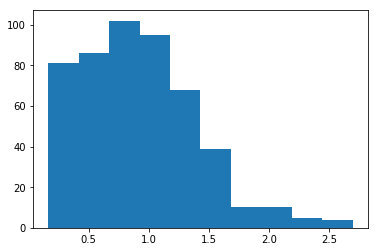

In [53]:
x_list = [np.log(1+np.exp(e)) for e in y_list]
plt.hist(x_list)
plt.show()

In [11]:
"""
x_list = []
y_list = []
for i in range(100):
    pos_samples, mom_samples, ratio = sampler.get_samples(init, 0.1, 5, 1, torch.tensor([1.], requires_grad=True))
    y = pos_samples.detach().numpy()[0][0]
    x = torch.log(1+torch.exp(pos_samples)).detach().numpy()[0][0]
    x_list.append(x)
    y_list.append(y)
"""

'\nx_list = []\ny_list = []\nfor i in range(100):\n    pos_samples, mom_samples, ratio = sampler.get_samples(init, 0.1, 5, 1, torch.tensor([1.], requires_grad=True))\n    y = pos_samples.detach().numpy()[0][0]\n    x = torch.log(1+torch.exp(pos_samples)).detach().numpy()[0][0]\n    x_list.append(x)\n    y_list.append(y)\n'

[ 1.61497581  0.31790423]


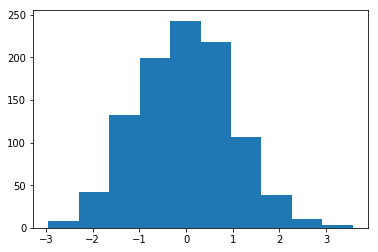

In [54]:
l = []
for i in range(1000):
    prng = np.random.RandomState()
    x = prng.normal(0)
    l.append(x)
x = prng.normal([0, 0])
print(x)
plt.hist(l)
plt.show()